**Dimensionality Reduction:**

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("zalando-research/fashionmnist")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/zalando-research/fashionmnist/versions/4


In [2]:
import numpy as np
import time
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import fashion_mnist
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [3]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

X_train, X_test = X_train / 255.0, X_test / 255.0

X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)


In [4]:
baseline_model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

baseline_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

start_time = time.time()
baseline_model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))
baseline_time = time.time() - start_time

baseline_loss, baseline_acc = baseline_model.evaluate(X_test, y_test, verbose=0)
print(f"Baseline Model Accuracy: {baseline_acc:.4f}, Training Time: {baseline_time:.2f} sec")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7636 - loss: 0.6912 - val_accuracy: 0.8459 - val_loss: 0.4269
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8637 - loss: 0.3806 - val_accuracy: 0.8548 - val_loss: 0.4035
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8768 - loss: 0.3361 - val_accuracy: 0.8589 - val_loss: 0.3797
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8822 - loss: 0.3147 - val_accuracy: 0.8733 - val_loss: 0.3536
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8911 - loss: 0.2983 - val_accuracy: 0.8710 - val_loss: 0.3470
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8975 - loss: 0.2781 - val_accuracy: 0.8785 - val_loss: 0.3317
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9002 - loss: 0.2661 - val_accuracy: 0.8763 - val_loss: 0.3515
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9074 - loss: 0.2514 - val_accuracy: 0.

In [5]:
# PCA
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_flat)
X_test_scaled = scaler.transform(X_test_flat)

pca = PCA(n_components=100)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print(f"Reduced dimensionality: {X_train_pca.shape[1]} features")


Reduced dimensionality: 100 features


In [6]:
# MLP model for PCA-reduced data
pca_model = Sequential([
    Dense(128, activation='relu', input_shape=(100,)),  # 100 PCA components
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

pca_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

start_time = time.time()
pca_model.fit(X_train_pca, y_train, epochs=10, batch_size=64, validation_data=(X_test_pca, y_test))
pca_time = time.time() - start_time

pca_loss, pca_acc = pca_model.evaluate(X_test_pca, y_test, verbose=0)
print(f"PCA Model Accuracy: {pca_acc:.4f}, Training Time: {pca_time:.2f} sec")


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7585 - loss: 0.7365 - val_accuracy: 0.8513 - val_loss: 0.4118
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8729 - loss: 0.3463 - val_accuracy: 0.8622 - val_loss: 0.3841
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8873 - loss: 0.3057 - val_accuracy: 0.8718 - val_loss: 0.3581
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8994 - loss: 0.2749 - val_accuracy: 0.8764 - val_loss: 0.3506
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9029 - loss: 0.2616 - val_accuracy: 0.8801 - val_loss: 0.3485
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9113 - loss: 0.2417 - val_accuracy: 0.8778 - val_loss: 0.3458
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9125 - loss: 0.2365 - val_accuracy: 0.8810 - val_loss: 0.3453
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9176 - loss: 0.2206 - val_accuracy: 0.8843 - val_

In [7]:
print("\nPerformance Comparison:")
print(f"Baseline Model -> Accuracy: {baseline_acc:.4f}, Time: {baseline_time:.2f} sec")
print(f"PCA Model (100 components) -> Accuracy: {pca_acc:.4f}, Time: {pca_time:.2f} sec")

explained_variance = np.sum(pca.explained_variance_ratio_)
print(f"PCA Retained Variance: {explained_variance:.4f}")



Performance Comparison:
Baseline Model -> Accuracy: 0.8871, Time: 43.44 sec
PCA Model (100 components) -> Accuracy: 0.8805, Time: 40.70 sec
PCA Retained Variance: 0.8715


**Feature Selection:**

In [8]:
import pandas as pd

# Load train and test datasets
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

# Display dataset info
train_df.info()
train_df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50400 entries, 0 to 50399
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   uid                            50400 non-null  int64  
 1   day                            44921 non-null  object 
 2   hour                           44787 non-null  float64
 3   minute                         44930 non-null  float64
 4   C_motion                       44883 non-null  float64
 5   feed_water_motion              44803 non-null  float64
 6   faucet_hole                    44834 non-null  float64
 7   vapour_pressure                44921 non-null  float64
 8   vapour_enthalpy                44963 non-null  float64
 9   vapour_pressure_at_division    44923 non-null  float64
 10  vapour_motion                  44923 non-null  float64
 11  feed_water_enth                44904 non-null  float64
 12  vapour_temperature             44883 non-null 

,uid,day,hour,minute,C_motion,feed_water_motion,faucet_hole,vapour_pressure,vapour_enthalpy,vapour_pressure_at_division,vapour_motion,feed_water_enth,vapour_temperature,output_electricity_generation
0,0,Saturday,7.0,NaN,387.374315,2681.205431,0.678352,25.050893,2775.784134,26.465138,2682.758692,1289.082351,601.850322,974.182544
1,1,Saturday,12.0,28.0,238.153011,1604.213100,0.679706,15.241147,2903.619864,NaN,1602.318002,1144.454102,603.933579,593.915516
2,2,Friday,15.0,13.0,338.270228,2398.561685,0.662971,23.078376,2796.443584,24.316160,NaN,1258.098883,602.443281,884.033450
3,3,Saturday,14.0,NaN,254.294492,1620.034059,0.679977,15.054982,2818.023511,15.895513,1619.387667,1142.463833,588.938717,584.908719
4,4,Saturday,18.0,16.0,203.189410,1485.672389,0.686342,12.963420,2816.144355,13.682371,1487.685052,1099.539481,504.208816,483.609973


In [9]:
# Fill numerical missing values with median
numerical_cols = train_df.select_dtypes(include=['float64', 'int64']).columns
train_df[numerical_cols] = train_df[numerical_cols].fillna(train_df[numerical_cols].median())

# Fill categorical missing values with mode
categorical_cols = train_df.select_dtypes(include=['object']).columns
train_df[categorical_cols] = train_df[categorical_cols].fillna(train_df[categorical_cols].mode().iloc[0])

# Verify no missing values remain
train_df.isnull().sum().sum()


0

In [10]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical features
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    train_df[col] = le.fit_transform(train_df[col])
    label_encoders[col] = le  # Store encoders for later use

# Verify encoding
train_df.head()


,uid,day,hour,minute,C_motion,feed_water_motion,faucet_hole,vapour_pressure,vapour_enthalpy,vapour_pressure_at_division,vapour_motion,feed_water_enth,vapour_temperature,output_electricity_generation
0,0,1,7.0,29.0,387.374315,2681.205431,0.678352,25.050893,2775.784134,26.465138,2682.758692,1289.082351,601.850322,974.182544
1,1,1,12.0,28.0,238.153011,1604.213100,0.679706,15.241147,2903.619864,24.609607,1602.318002,1144.454102,603.933579,593.915516
2,2,0,15.0,13.0,338.270228,2398.561685,0.662971,23.078376,2796.443584,24.316160,2464.477152,1258.098883,602.443281,884.033450
3,3,1,14.0,29.0,254.294492,1620.034059,0.679977,15.054982,2818.023511,15.895513,1619.387667,1142.463833,588.938717,584.908719
4,4,1,18.0,16.0,203.189410,1485.672389,0.686342,12.963420,2816.144355,13.682371,1487.685052,1099.539481,504.208816,483.609973


In [11]:
from sklearn.feature_selection import f_classif, SelectKBest

# Define X and y
X = train_df.drop(columns=['output_electricity_generation'])
y = train_df['output_electricity_generation']

# Apply ANOVA F-Test
anova_selector = SelectKBest(score_func=f_classif, k=8)  # Select top 8 features
X_selected_anova = anova_selector.fit_transform(X, y)

# Get selected features
selected_anova_features = X.columns[anova_selector.get_support()]
print("ANOVA Selected Features:", selected_anova_features.tolist())


ANOVA Selected Features: ['C_motion', 'feed_water_motion', 'faucet_hole', 'vapour_pressure', 'vapour_enthalpy', 'vapour_pressure_at_division', 'vapour_motion', 'vapour_temperature']


In [13]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import train_test_split

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Use a faster model (GradientBoosting)
model = GradientBoostingRegressor(n_estimators=50, random_state=42)  # Reduced estimators

# Apply Greedy Best-First Selection with Parallel Processing
sfs = SequentialFeatureSelector(
    model,
    n_features_to_select=5,  # Reduced number of features
    direction='forward',
    n_jobs=-1  # Parallel processing to speed up computation
)

# Fit model (should be much faster now)
sfs.fit(X_train, y_train)

# Get selected features
selected_greedy_features = X.columns[sfs.get_support()]
print("Optimized Greedy Best-First Selected Features:", selected_greedy_features.tolist())




Optimized Greedy Best-First Selected Features: ['feed_water_motion', 'vapour_pressure_at_division', 'vapour_motion', 'feed_water_enth', 'vapour_temperature']


In [14]:
# Compare selected features
print("ANOVA Features:", selected_anova_features.tolist())
print("Greedy Best-First Features:", selected_greedy_features.tolist())

# Find common features
common_features = set(selected_anova_features) & set(selected_greedy_features)
print("Common Features:", list(common_features))


ANOVA Features: ['C_motion', 'feed_water_motion', 'faucet_hole', 'vapour_pressure', 'vapour_enthalpy', 'vapour_pressure_at_division', 'vapour_motion', 'vapour_temperature']
Greedy Best-First Features: ['feed_water_motion', 'vapour_pressure_at_division', 'vapour_motion', 'feed_water_enth', 'vapour_temperature']
Common Features: ['vapour_temperature', 'vapour_motion', 'vapour_pressure_at_division', 'feed_water_motion']


In [15]:
# Extract day & hour from timestamp (if applicable)
if 'timestamp' in train_df.columns:
    train_df['timestamp'] = pd.to_datetime(train_df['timestamp'])
    train_df['day'] = train_df['timestamp'].dt.day
    train_df['hour'] = train_df['timestamp'].dt.hour

# Create 'is_weekend' feature
train_df['is_weekend'] = train_df['day'].apply(lambda x: 1 if x in [6, 7] else 0)

# Create interaction feature
if 'vapour_pressure' in train_df.columns and 'vapour_motion' in train_df.columns:
    train_df['vapour_pressure_ratio'] = train_df['vapour_pressure'] / (train_df['vapour_motion'] + 1e-5)

# Verify new features
train_df.head()


,uid,day,hour,minute,C_motion,feed_water_motion,faucet_hole,vapour_pressure,vapour_enthalpy,vapour_pressure_at_division,vapour_motion,feed_water_enth,vapour_temperature,output_electricity_generation,is_weekend,vapour_pressure_ratio
0,0,1,7.0,29.0,387.374315,2681.205431,0.678352,25.050893,2775.784134,26.465138,2682.758692,1289.082351,601.850322,974.182544,0,0.009338
1,1,1,12.0,28.0,238.153011,1604.213100,0.679706,15.241147,2903.619864,24.609607,1602.318002,1144.454102,603.933579,593.915516,0,0.009512
2,2,0,15.0,13.0,338.270228,2398.561685,0.662971,23.078376,2796.443584,24.316160,2464.477152,1258.098883,602.443281,884.033450,0,0.009364
3,3,1,14.0,29.0,254.294492,1620.034059,0.679977,15.054982,2818.023511,15.895513,1619.387667,1142.463833,588.938717,584.908719,0,0.009297
4,4,1,18.0,16.0,203.189410,1485.672389,0.686342,12.963420,2816.144355,13.682371,1487.685052,1099.539481,504.208816,483.609973,0,0.008714


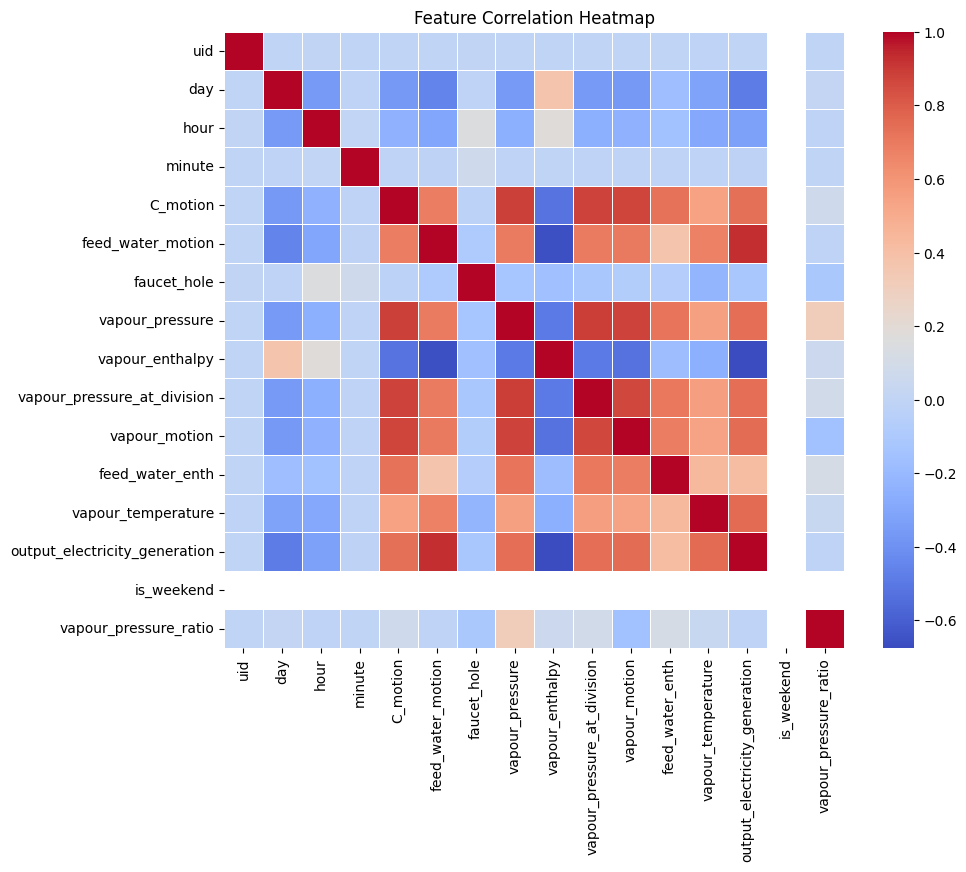

Highly correlated features to consider removing: ['uid', 'day', 'hour', 'minute', 'C_motion', 'feed_water_motion', 'faucet_hole', 'vapour_pressure', 'vapour_enthalpy', 'vapour_pressure_at_division', 'vapour_motion', 'feed_water_enth', 'vapour_temperature', 'vapour_pressure_ratio']


In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr_matrix = train_df.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

# Find highly correlated features (threshold > 0.85)
high_corr_features = [col for col in corr_matrix if any(corr_matrix[col] > 0.85) and col != 'output_electricity_generation']
print("Highly correlated features to consider removing:", high_corr_features)


**K means:**

In [18]:
import pandas as pd
iris_df = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv")
iris_df.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [19]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
iris_df['species_encoded'] = le.fit_transform(iris_df['species'])
X = iris_df.drop(columns=['species', 'species_encoded'])
X.head()


,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [20]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
iris_df['cluster'] = kmeans.fit_predict(X)
iris_df[['species', 'cluster']].head(10)


,species,cluster
0,setosa,1
1,setosa,1
2,setosa,1
3,setosa,1
4,setosa,1
5,setosa,1
6,setosa,1
7,setosa,1
8,setosa,1
9,setosa,1


In [21]:
from sklearn.metrics import silhouette_score
score = silhouette_score(X, iris_df['cluster'])
print(f"Silhouette Score: {score:.4f}")


Silhouette Score: 0.5528


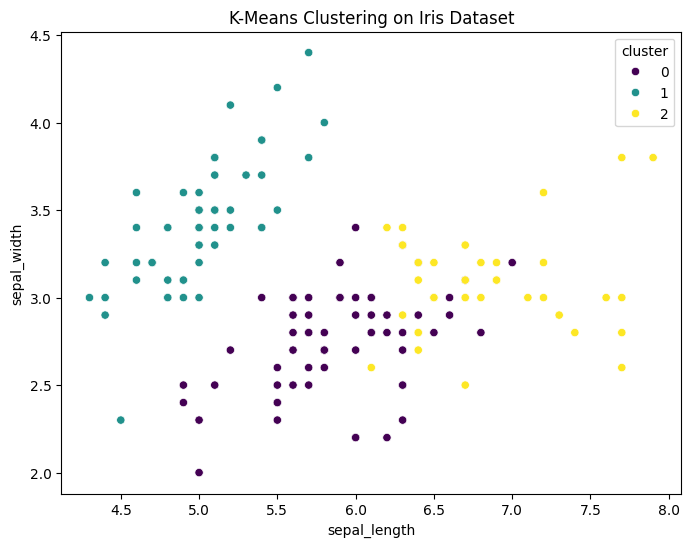

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.scatterplot(x=iris_df["sepal_length"], y=iris_df["sepal_width"], hue=iris_df["cluster"], palette="viridis")
plt.title("K-Means Clustering on Iris Dataset")
plt.show()
